In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bronx_rent = './Data/zillowBronx.csv'
df_bronx = pd.read_csv(bronx_rent)

manhattan_rent = './Data/zillowManhattan.csv'
df_manhattan = pd.read_csv(manhattan_rent)

brooklyn_rent = './Data/zillowBrooklyn.csv'
df_brooklyn = pd.read_csv(brooklyn_rent)

queens_rent = './Data/zillowQueens.csv'
df_queens = pd.read_csv(queens_rent)

statenIs_rent = './Data/zillowStatenIsland.csv'
df_statenIs = pd.read_csv(statenIs_rent)

df_bronx.head()

,price,address,bedrooms,bathrooms,squareFeet
0,"$1,590","2908 Valentine Ave, Bronx, NY 10458",1,1,--
1,"$2,000","2120 Wallace Ave, Bronx, NY 10462",1,1,912
2,"$1,900","3035 Grand Concourse, Bronx, NY 10468",2,1,"1,200"
3,"$1,750","2081 Wallace Ave #517, Bronx, NY 10462",2,1,775
4,"$2,100","2481 Elm Pl #1, Bronx, NY 10458",2,1,--


### Data is stored in strings, convert them to floats

In [4]:
def columnToNumeric(df):
    df['zip'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
    df['price'] = df['price'].replace('[\$,]', '', regex=True)
    df['squareFeet'] = df['squareFeet'].replace('[\,]', '', regex=True)
    df['bedrooms'] = df['bedrooms'].replace('Studio', '.5')
    df.price = pd.to_numeric(df.price, errors='coerce')
    df.squareFeet = pd.to_numeric(df.squareFeet, errors='coerce')
    df.zip = pd.to_numeric(df.zip, errors='coerce')
    df.bedrooms = pd.to_numeric(df.bedrooms, errors='coerce')
    df.bathrooms = pd.to_numeric(df.bathrooms, errors='coerce')
    return df

bronx_rent = columnToNumeric(df_bronx)
manhattan_rent = columnToNumeric(df_manhattan)
brooklyn_rent = columnToNumeric(df_brooklyn)
queens_rent = columnToNumeric(df_queens)
statenIs_rent = columnToNumeric(df_statenIs)


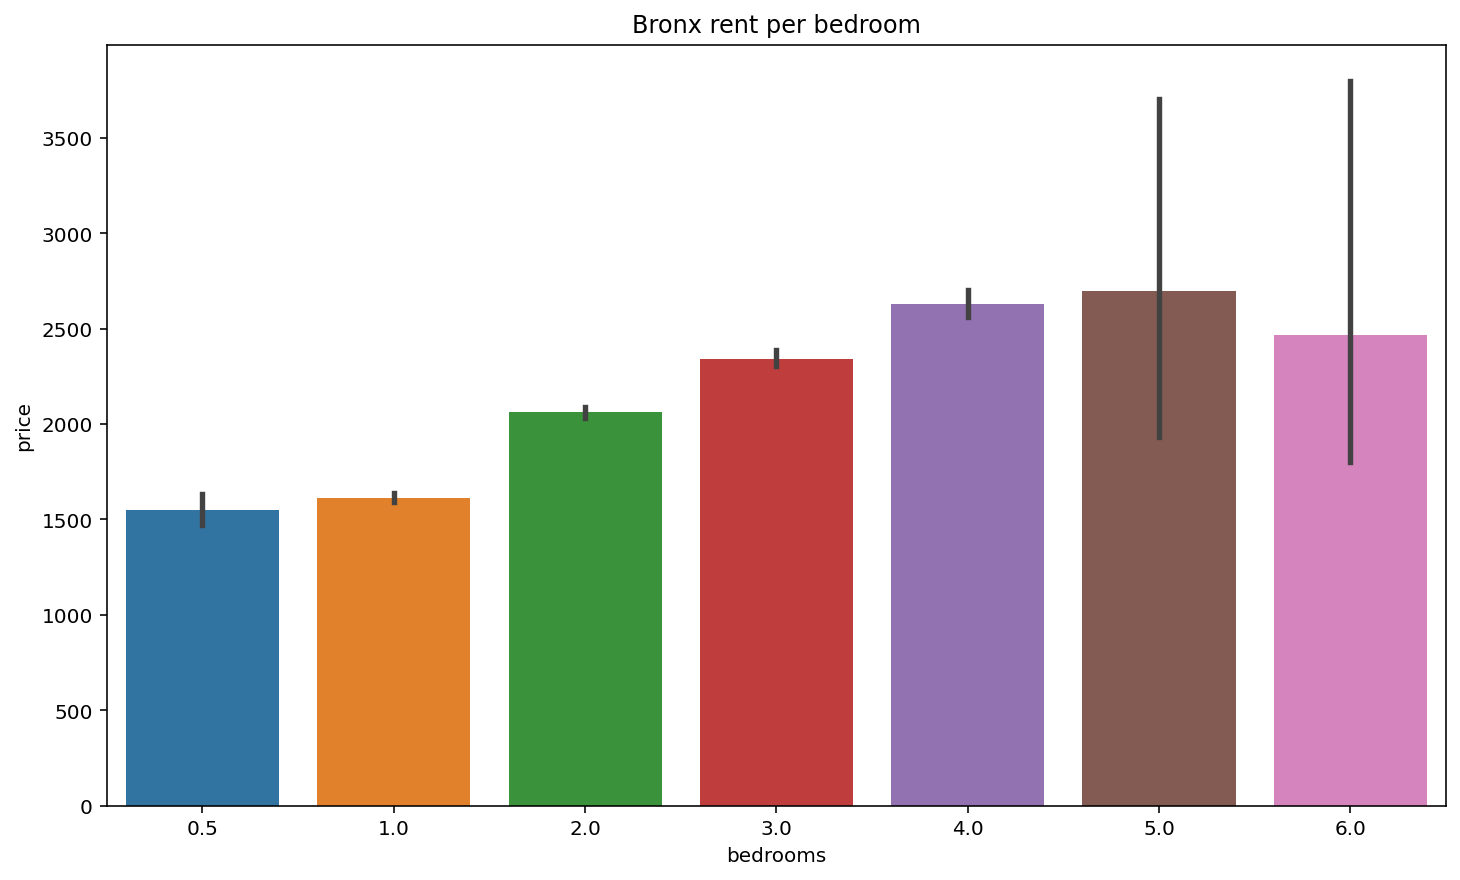

In [5]:
plt.title('Bronx rent per bedroom')
ax = sns.barplot(x="bedrooms", y="price", data=bronx_rent)

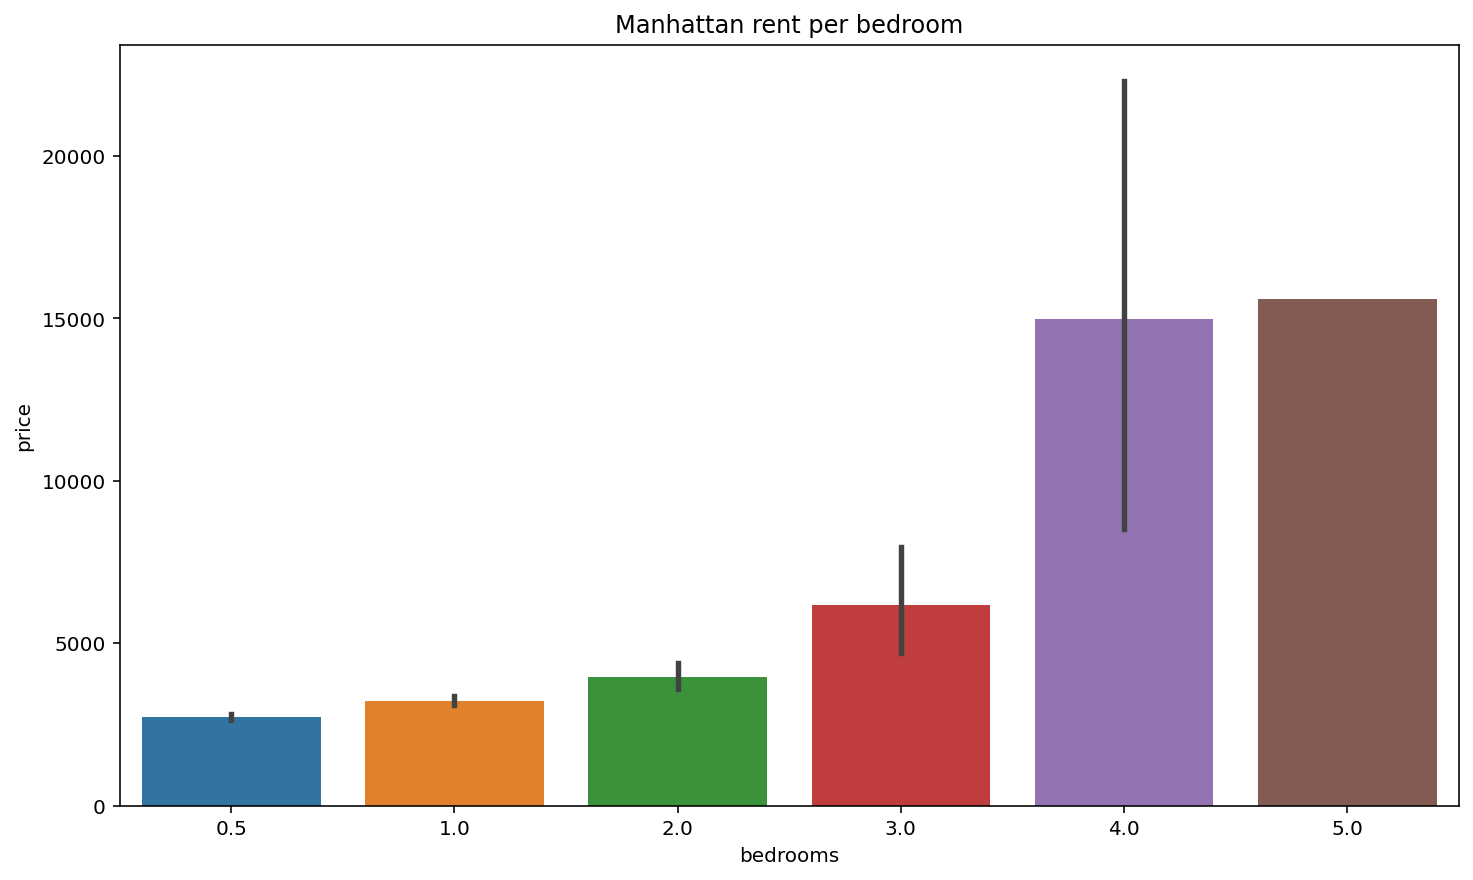

In [6]:
plt.title('Manhattan rent per bedroom')
ax = sns.barplot(x="bedrooms", y="price", data=manhattan_rent)

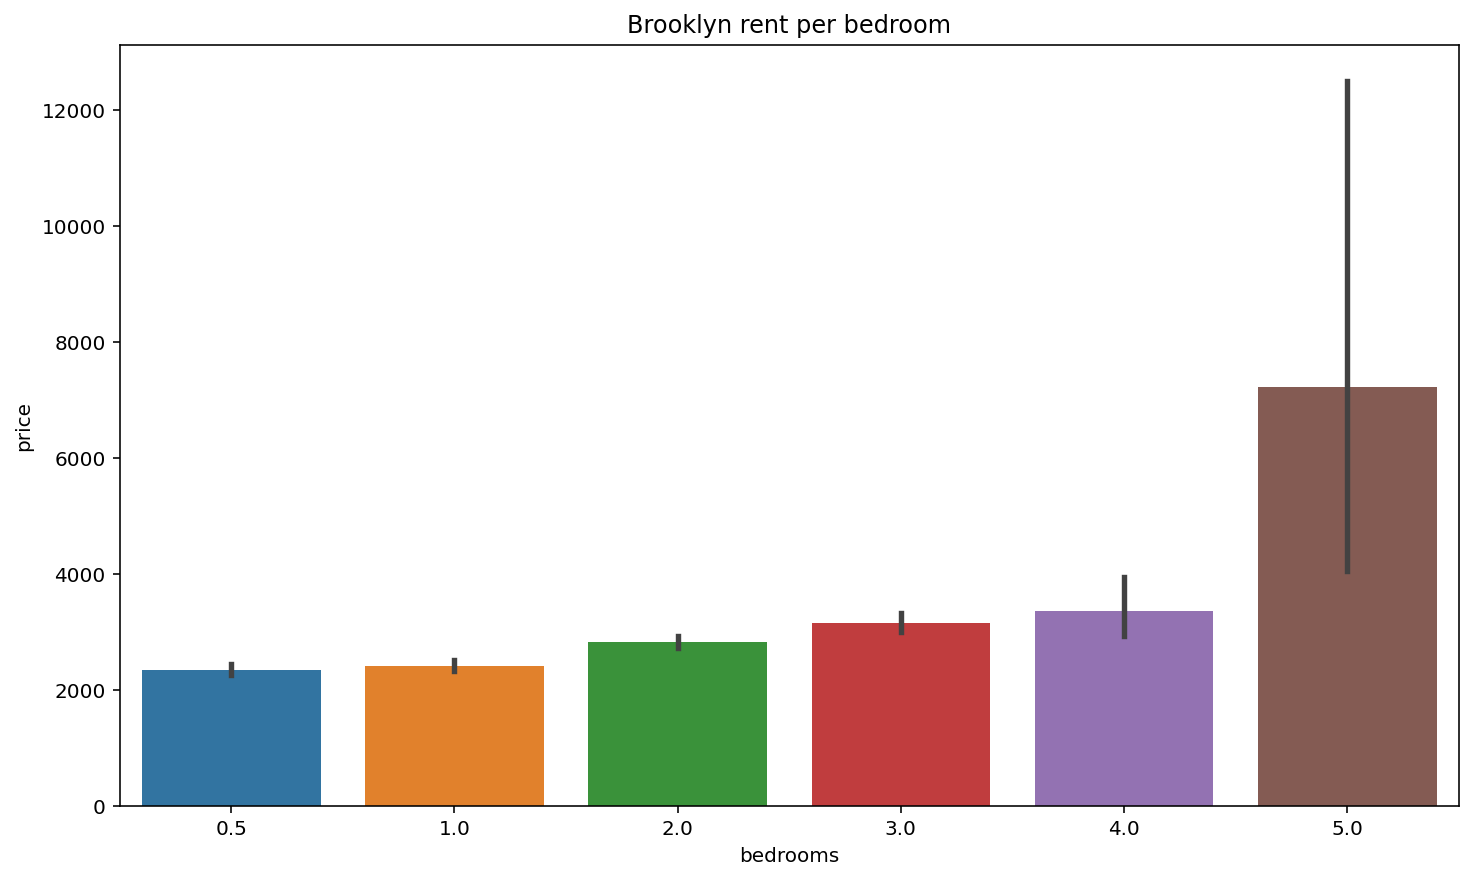

In [7]:
plt.title('Brooklyn rent per bedroom')
ax = sns.barplot(x="bedrooms", y="price", data=brooklyn_rent)

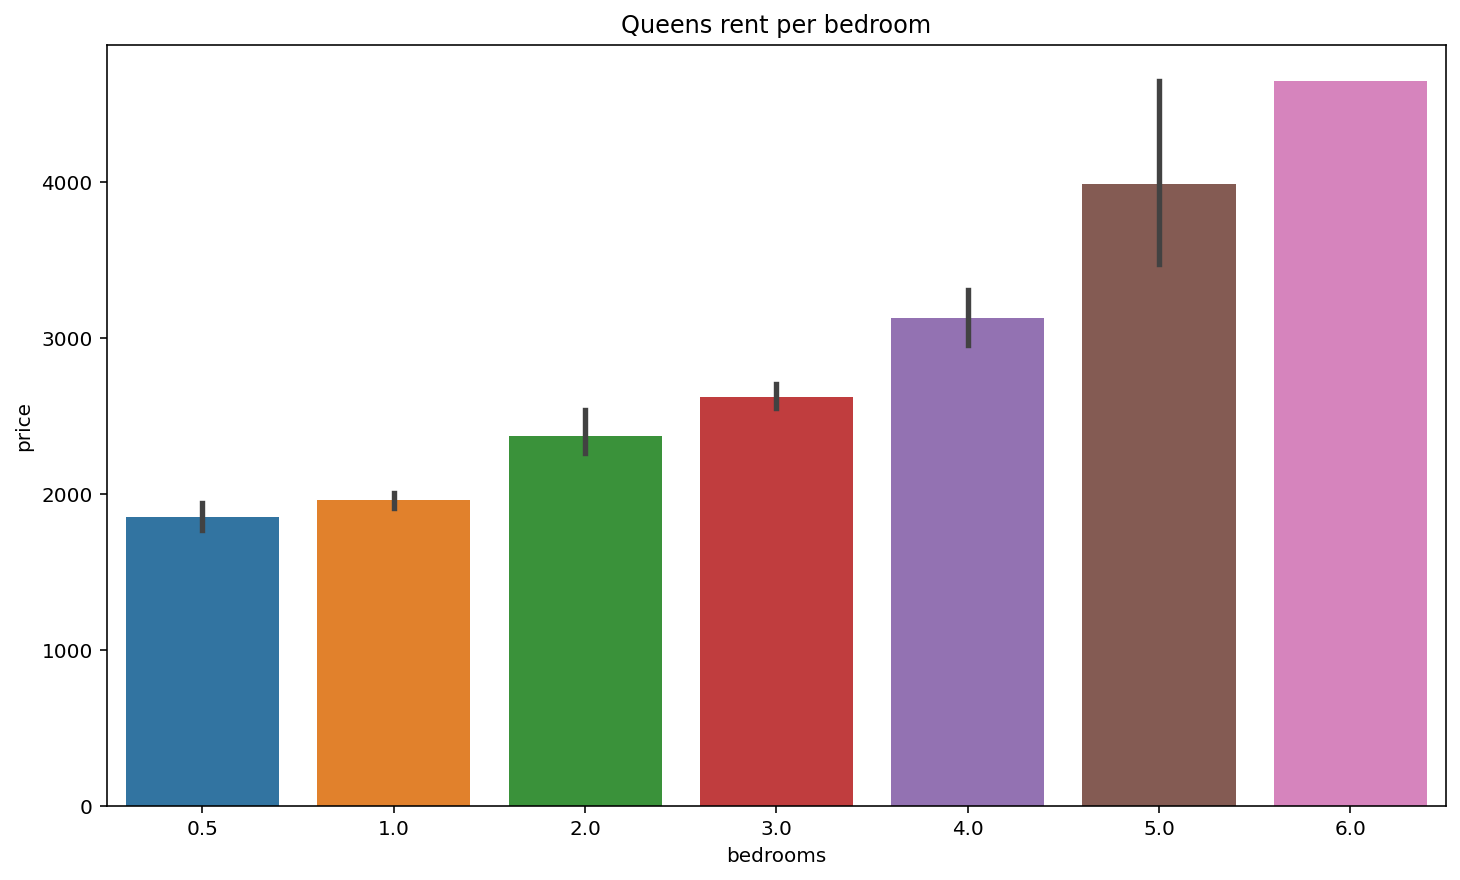

In [8]:
plt.title('Queens rent per bedroom')
ax = sns.barplot(x="bedrooms", y="price", data=queens_rent)

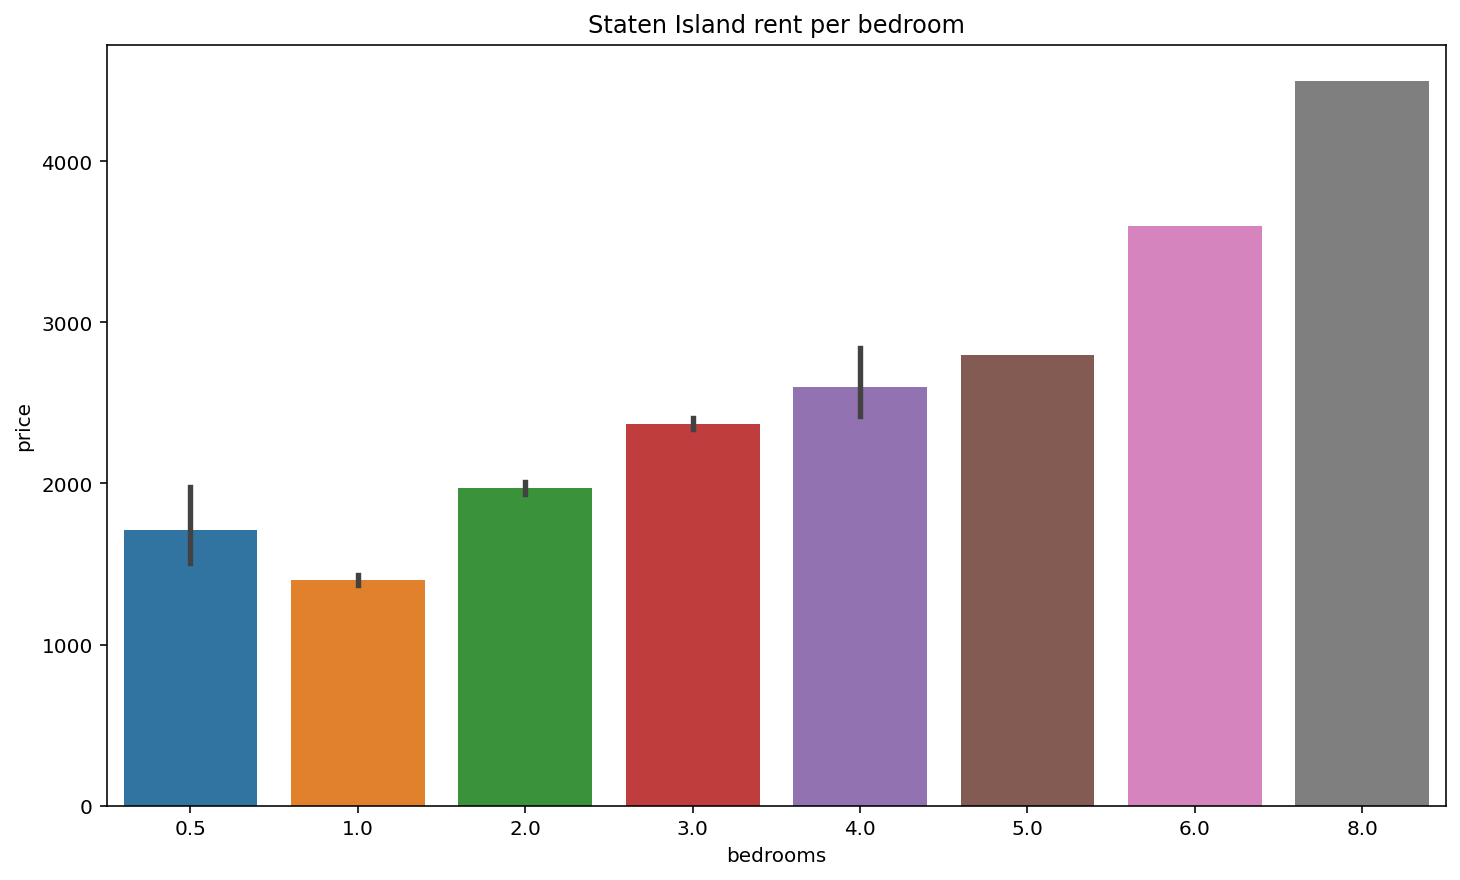

In [9]:
plt.title('Staten Island rent per bedroom')
ax = sns.barplot(x="bedrooms", y="price", data=statenIs_rent)

### Add borough column to data frames and combine them

In [10]:
bronx_rent['borough_num'] = 1
brooklyn_rent['borough_num'] = 2
queens_rent['borough_num'] = 3
manhattan_rent['borough_num'] = 4
statenIs_rent['borough_num'] = 5

frames = [bronx_rent, queens_rent,statenIs_rent,manhattan_rent,brooklyn_rent]
nyc_rent = pd.concat(frames)
nyc_rent.reset_index(inplace=True)
cols = list(nyc_rent.columns.values)

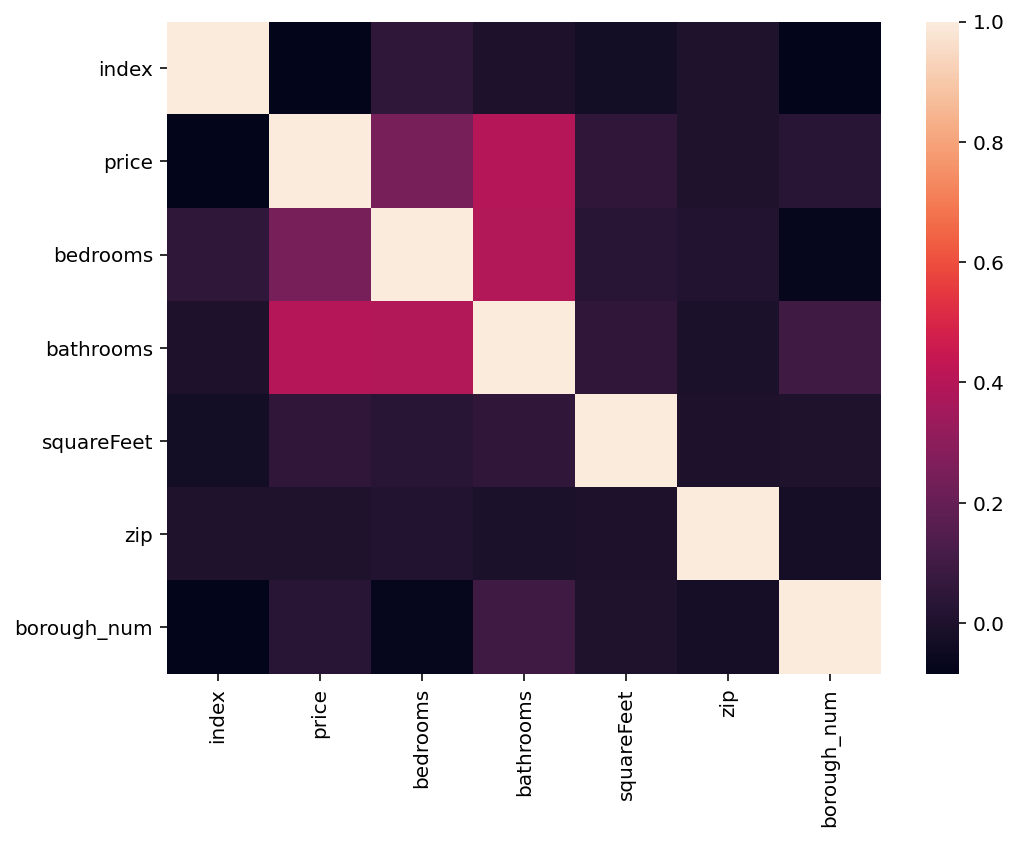

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(nyc_rent.corr())
plt.show()

### Add zipcode, borough as columns and drop N/As

In [12]:
features = ['bedrooms', 'bathrooms', 'squareFeet','borough#1','borough#2','borough#3','borough#4','borough#5','zipcode#10013.0','zipcode#10028.0','zipcode#10011.0']
nyc_rent = nyc_rent.dropna()

In [13]:
dummies_zipcodes = pd.get_dummies(nyc_rent['zip'], drop_first=False)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}#".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode#10013.0','zipcode#10028.0','zipcode#10011.0']]
nyc_rent.drop('zip', axis=1, inplace=True)
nyc_rent = nyc_rent.join(dummies_zipcodes)

dummies_borough = pd.get_dummies(nyc_rent['borough_num'], drop_first=False)
dummies_borough = dummies_borough.add_prefix("{}#".format('borough'))
dummies_borough = dummies_borough[['borough#1','borough#2','borough#3','borough#4','borough#5']]
nyc_rent = nyc_rent.join(dummies_borough)

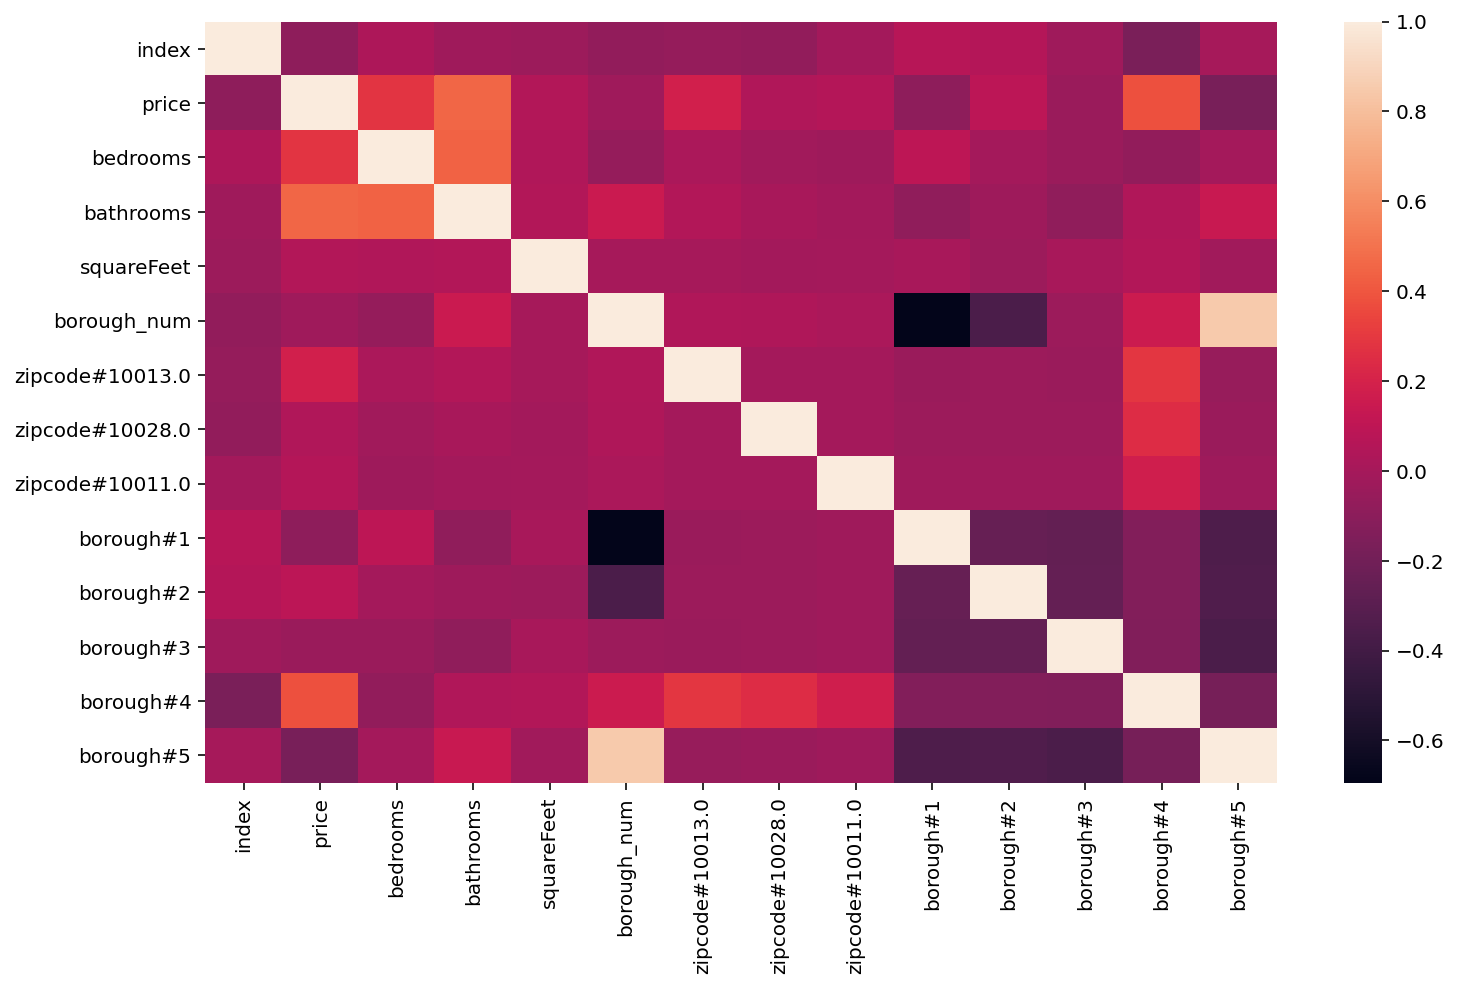

In [14]:
corrMatrix = nyc_rent.corr()
sns.heatmap(corrMatrix)
plt.show()

### Train the model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
nyc_rent[features], nyc_rent.price, test_size = 0.33, random_state = 33)
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predict = model.predict(X_test)
model.score(X_test,y_test)

-0.09289483788629038

In [19]:
test = {'bedrooms':[2], 
         'bathrooms':[1], 
         'squareFeet':[1200],
        
#            Bronx
         'borough#1':[1],
#            Brooklyn
         'borough#2':[0], 
#            Queens
         'borough#3':[0], 
#            Manhattan
         'borough#4':[0], 
#            Staten Island
         'borough#5':[0], 
         'zipcode#10013.0':[0],
         'zipcode#10028.0':[0],
         'zipcode#10011.0':[0]
        }

In [20]:
test = pd.DataFrame(test)
model.predict(test)

array([1631.10609488])

### Scale Data and drop 25% of highest prices

In [21]:
lower = int(len(nyc_rent)*.75)
nyc_scaled = nyc_rent.nsmallest(lower,'price')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_scaled[features], nyc_scaled.price, test_size = 0.33, random_state = 122)
model = LinearRegression()

# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_predict = model.predict(X_test)
model.score(X_test,y_test)


0.6173188189154307

In [25]:
RegModel = Lasso(alpha = .1)
RegModel.fit(X_train, y_train)
RegModel.score(X_test,y_test)

0.6182392894476457

In [26]:
RidgeModel = Ridge(alpha=1e-10)
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.87586e-20): result may not be accurate.
  overwrite_a=True).T


0.6173188189161198

In [27]:
test = {'bedrooms':[2], 
         'bathrooms':[1], 
         'squareFeet':[1600.0],
         'borough#1':[0],
         'borough#2':[0],
         'borough#3':[0],
         'borough#4':[1],
         'borough#5':[0],
         'zipcode#10013.0':[0],
         'zipcode#10028.0':[0],
         'zipcode#10011.0':[0]
        }

In [28]:
test = pd.DataFrame(test)
'${:,.2f}'.format(model.predict(test).flat[0])

'$2,546.67'

In [29]:
nyc_scaled.shape

(1397, 15)